#### Step 1: Importare le librerie
#### Step 2: Caricare il dataset. Inserire il percorso del file CSV
#### Step 3: Visualizzare le prime righe del dataset
#### Step 4: Visualizzare il numero di righe e colonne
#### Step 5: Visualizzare i tipi di dati
#### Step 6: Statistiche descrittive

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap

df = pd.read_csv(r'C:\Users\massi\PycharmProjects\siamoTesi\data\us_car_data.csv')

print(df.head())

print(f"Numero di righe e colonne: {df.shape}")

print(f"Tipi di dati:\n{df.dtypes}")

print(f"Statistiche descrittive:\n{df.describe()}")

      County       City State  Postal Code  Model Year    Make    Model  \
0   Thurston   Tumwater    WA        98512        2019   TESLA  MODEL 3   
1     Island    Clinton    WA        98236        2022  NISSAN     LEAF   
2  Snohomish  Snohomish    WA        98290        2020   TESLA  MODEL 3   
3       King    Seattle    WA        98134        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds    WA        98020        2013   TESLA  MODEL S   

         Electric Vehicle Type  \
0  Battery Electric Vehicle      
1  Battery Electric Vehicle      
2  Battery Electric Vehicle      
3  Battery Electric Vehicle      
4  Battery Electric Vehicle      

                                                CAFV  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             220   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             266   
3            Clean Alternative Fuel Vehicle Eligible    

Elimino le colonne non necessarie, in particolare 'DOL Vehicle ID', 'Legislative District', 'Postal Code', '2020 Census Tract' sono dati irrilevanti. 'CAFV' è un dato descrittivo che si basa sull'autonomia (Battery Range). Infine 'Base MSRP' ha troppi valori nulli e comunque non ci interessa il prezzo base di un veicolo. Infine, verifico se lo stato è lo stesso per tutti i record.

In [61]:
df_cleaned = df.drop(columns=['DOL Vehicle ID', 'Legislative District', 'Postal Code', '2020 Census Tract', 'CAFV', 'Base MSRP'])

unique_states = df_cleaned['State'].nunique()  # Conta il numero di valori unici

if unique_states == 1:
    print(f"Tutti i record appartengono allo stesso stato: {df_cleaned['State'].unique()[0]}")
else:
    print(f"Il dataset contiene {unique_states} stati differenti: {df_cleaned['State'].unique()}")


Tutti i record appartengono allo stesso stato: WA


Dato che tutti i record hanno stato WA, eliminiamo la colonna in quanto superflua

In [62]:
df_cleaned = df_cleaned.drop(columns=['State'])  # Usa df_cleaned qui

print(df_cleaned.head())


      County       City  Model Year    Make    Model  \
0   Thurston   Tumwater        2019   TESLA  MODEL 3   
1     Island    Clinton        2022  NISSAN     LEAF   
2  Snohomish  Snohomish        2020   TESLA  MODEL 3   
3       King    Seattle        2020   TESLA  MODEL 3   
4  Snohomish    Edmonds        2013   TESLA  MODEL S   

         Electric Vehicle Type  Electric Range  \
0  Battery Electric Vehicle                220   
1  Battery Electric Vehicle                  0   
2  Battery Electric Vehicle                266   
3  Battery Electric Vehicle                322   
4  Battery Electric Vehicle                208   

                               Electric Utility   Longitude   latitude  
0                        PUGET SOUND ENERGY INC -122.913102  47.013593  
1                        PUGET SOUND ENERGY INC -122.359364  47.979655  
2                        PUGET SOUND ENERGY INC -122.091505  47.915555  
3  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA) -122.329815  47.579810

Creiamo 3 grafici: 

`Auto per anno di produzione`: Un grafico a barre per mostrare quante auto sono state registrate ogni anno.

`Auto per marca e modello`: Un grafico a barre per visualizzare il numero di auto registrate suddivise per marca e modello.

`Auto per città`: Un grafico a barre per visualizzare il numero di auto registrate in ciascuna città.

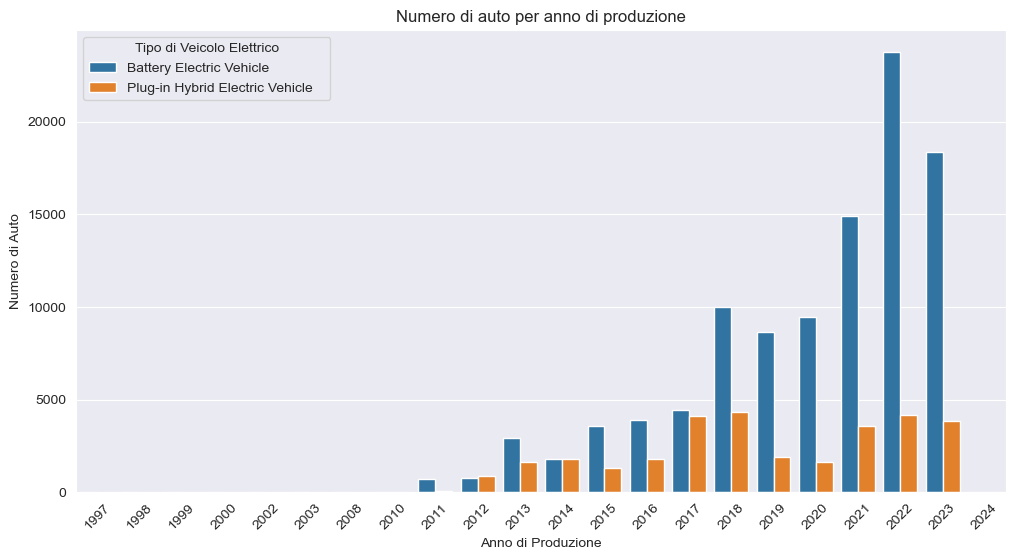

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Model Year', hue='Electric Vehicle Type')
plt.title('Numero di auto per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto')
plt.xticks(rotation=45)
plt.legend(title='Tipo di Veicolo Elettrico')
plt.show()

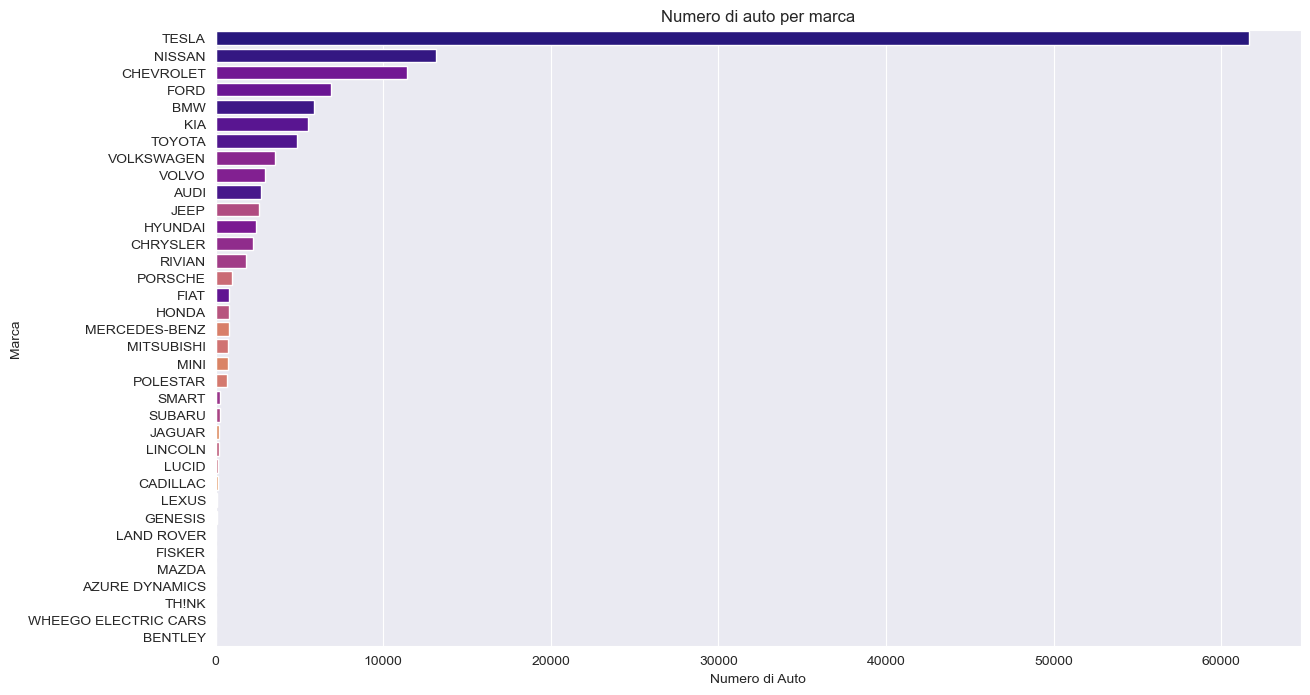

In [64]:
# Grafico 2: Numero di auto per marca
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='Make', order=df_cleaned['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


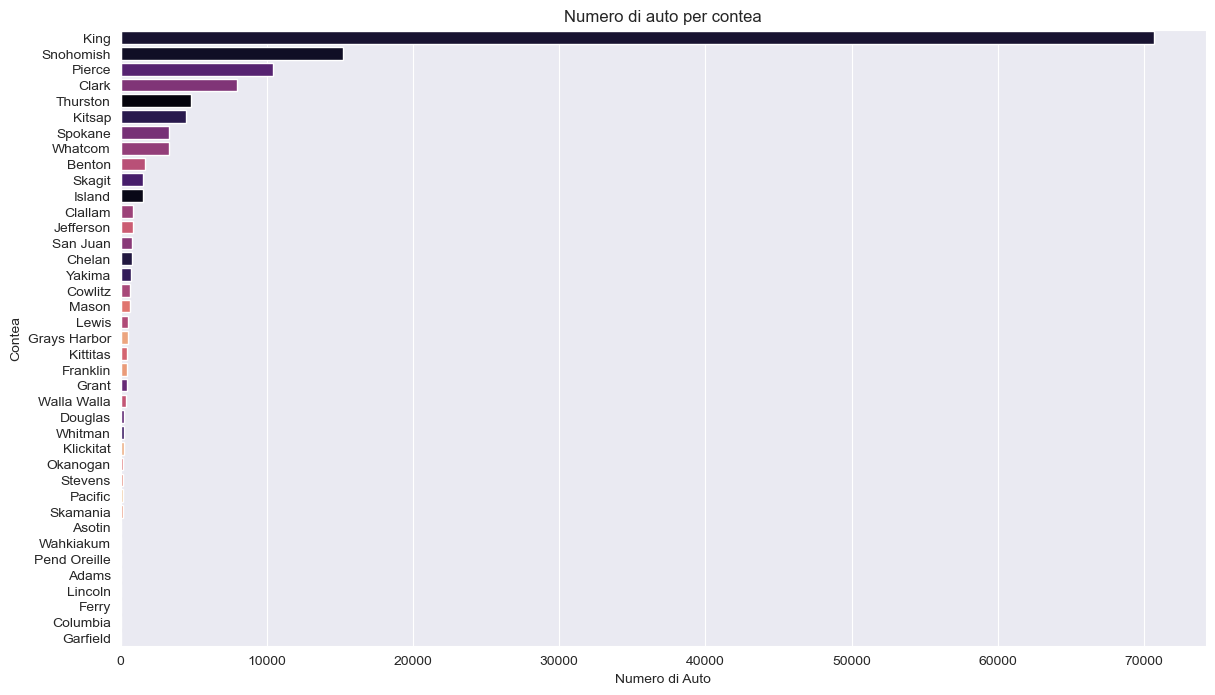

In [65]:
# Grafico 3: Numero di auto per contea
plt.figure(figsize=(14, 8))
sns.countplot(data=df_cleaned, y='County', order=df_cleaned['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()

Dai grafici si evince che il mercato è dominato da alcuni marchi più popolari, che hanno venduto prevalmentemente negli ultimi anni. Inoltre, alcune contee sembrano avere più veicoli elettrici di altre. Di conseguenza andiamo a scremare il dataset, escludendo quei record che non raggiungono una certa soglia di popolarità del marchio e selezioniamo solo le 10 contee con più registrazioni.

In [66]:
# Seleziona le marche che hanno più di 100 veicoli registrati (puoi modificare la soglia in base alle tue necessità)
popular_brands = df_cleaned['Make'].value_counts()
popular_brands = popular_brands[popular_brands > 500].index  # Marche con più di 100 auto

# Filtrare il dataset per mantenere solo le auto delle marche popolari
df_filtered = df_cleaned[df_cleaned['Make'].isin(popular_brands)]


Prendo le prime 10 contee

In [67]:
top_10_counties = df_filtered['County'].value_counts().head(10).index  

# Filtrare il dataset per mantenere solo le auto delle prime 10 contee
df_filtered = df_filtered[df_filtered['County'].isin(top_10_counties)]

#print(df_filtered.head())

Rifaccio il grafico delle marche

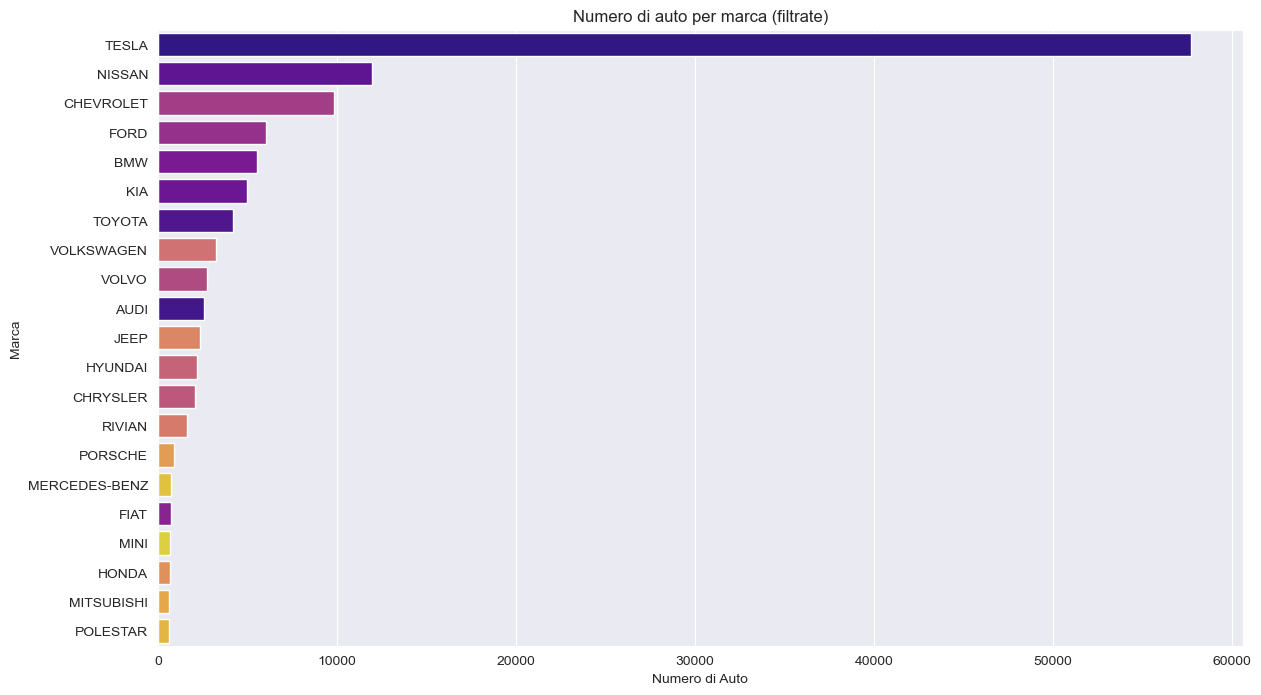

In [68]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='Make', order=df_filtered['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()


Rifaccio il grafico delle contee

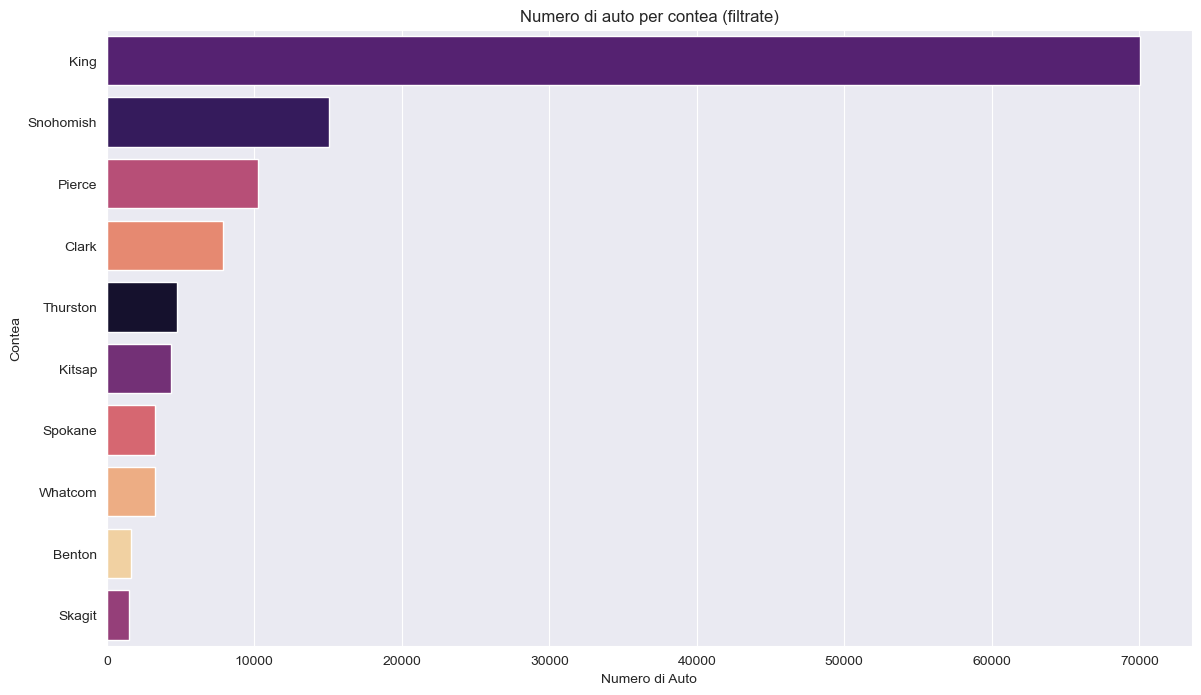

In [69]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='County', order=df_filtered['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea (filtrate)')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()


Calcolo quanti record ho rimosso

In [70]:
# Numero di righe nel dataset originale e in quello filtrato
rows_original = df.shape[0]
rows_filtered = df_filtered.shape[0]

# Calcolo della percentuale di dati rimossi
percentage_removed = ((rows_original - rows_filtered) / rows_original) * 100

# Stampa il numero di righe e colonne e la percentuale di dati rimossi
print(f"Numero di righe e colonne nel dataset originale: {df.shape}")
print(f"Numero di righe e colonne nel dataset filtrato: {df_filtered.shape}")
print(f"Percentuale di righe rimosse: {percentage_removed:.2f}%")

Numero di righe e colonne nel dataset originale: (134474, 17)
Numero di righe e colonne nel dataset filtrato: (122116, 10)
Percentuale di righe rimosse: 9.19%


Andiamo inoltre ad eliminare i valori nulli o zero dalle colonne rimaste nel dataset. 
Prima eliminiamo le righe che contengono valori nulli, poi quelle con valori pari a zero nelle colonne numeriche rilevanti (in questo caso l'autonomia elettrica).

Numero di righe e colonne dopo la pulizia: (69698, 10)


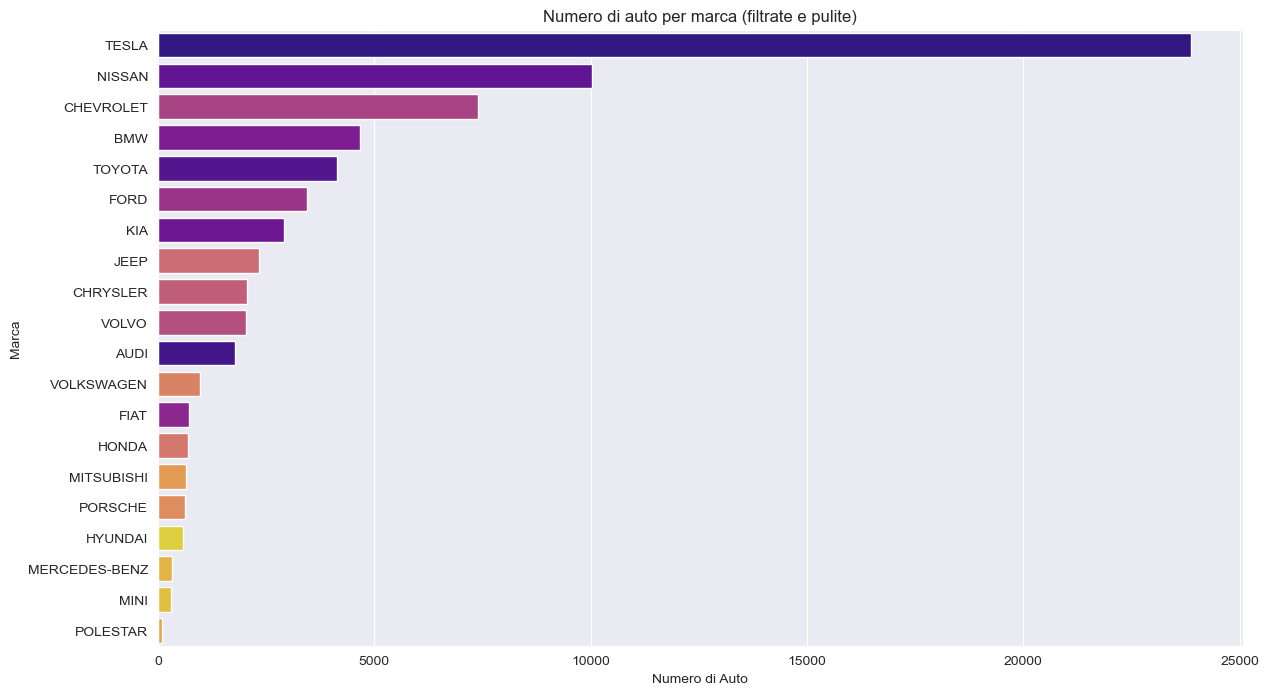

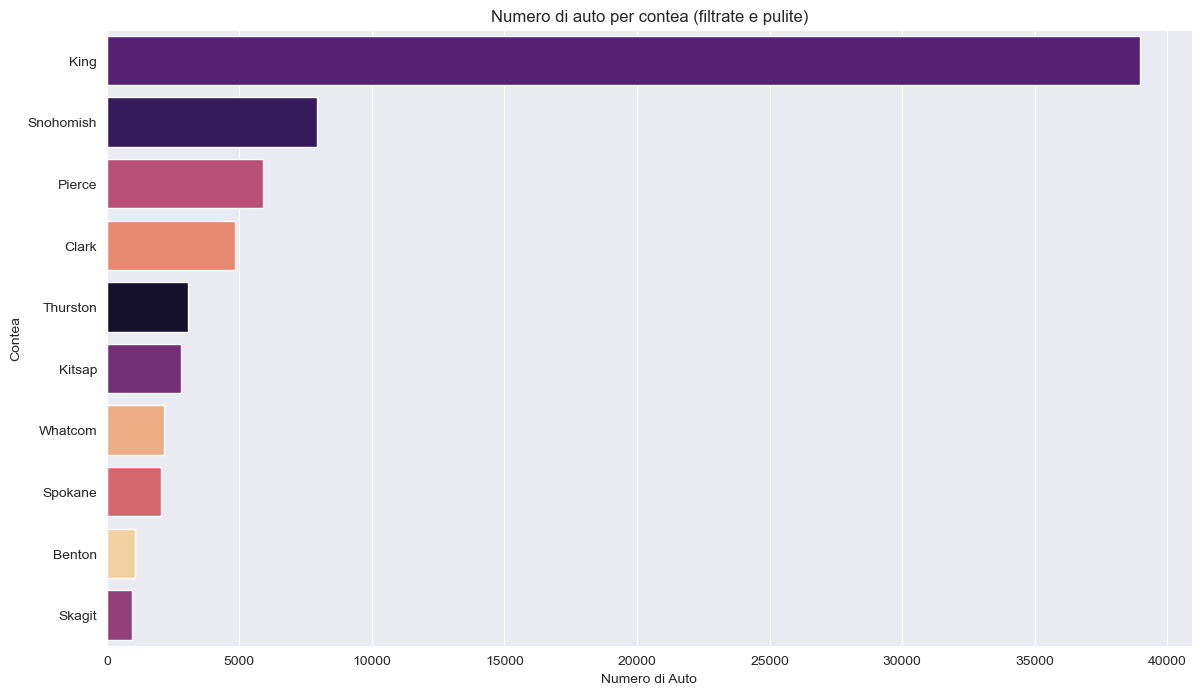

Numero di righe e colonne nel dataset originale: (134474, 17)
Numero di righe e colonne nel dataset pulito e filtrato: (69698, 10)
Percentuale di righe rimosse: 48.17%


In [71]:
# Rimozione dei valori nulli
df_filtered = df_filtered.dropna()

# Rimozione dei valori pari a zero nelle colonne numeriche rilevanti
df_filtered = df_filtered[(df_filtered['Electric Range'] > 0)]

# Stampa il numero di righe e colonne dopo la pulizia
print(f"Numero di righe e colonne dopo la pulizia: {df_filtered.shape}")

# Grafici aggiornati

# Grafico aggiornato per le marche
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='Make', order=df_filtered['Make'].value_counts().index, palette='plasma', hue='Make')
plt.title('Numero di auto per marca (filtrate e pulite)')
plt.xlabel('Numero di Auto')
plt.ylabel('Marca')
plt.show()

# Grafico aggiornato per le contee
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered, y='County', order=df_filtered['County'].value_counts().index, palette='magma', hue='County')
plt.title('Numero di auto per contea (filtrate e pulite)')
plt.xlabel('Numero di Auto')
plt.ylabel('Contea')
plt.show()

# Aggiornamento del calcolo delle righe rimosse
rows_cleaned = df_filtered.shape[0]
percentage_removed_cleaned = ((rows_original - rows_cleaned) / rows_original) * 100

# Stampa il numero di righe e la percentuale di righe rimosse
print(f"Numero di righe e colonne nel dataset originale: {df.shape}")
print(f"Numero di righe e colonne nel dataset pulito e filtrato: {df_filtered.shape}")
print(f"Percentuale di righe rimosse: {percentage_removed_cleaned:.2f}%")

Grafico 1: Tendenze nel tempo (numero di auto registrate per anno di produzione)

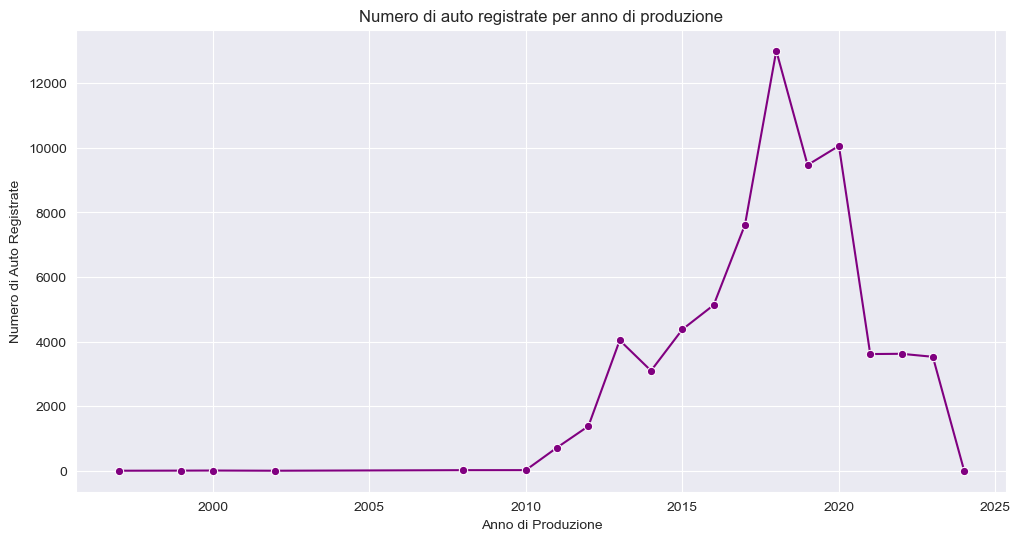

In [72]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered['Model Year'].value_counts().sort_index(), marker='o', color='purple')
plt.title('Numero di auto registrate per anno di produzione')
plt.xlabel('Anno di Produzione')
plt.ylabel('Numero di Auto Registrate')
plt.show()


Grafico 2: Distribuzione dell'autonomia elettrica (Electric Range)

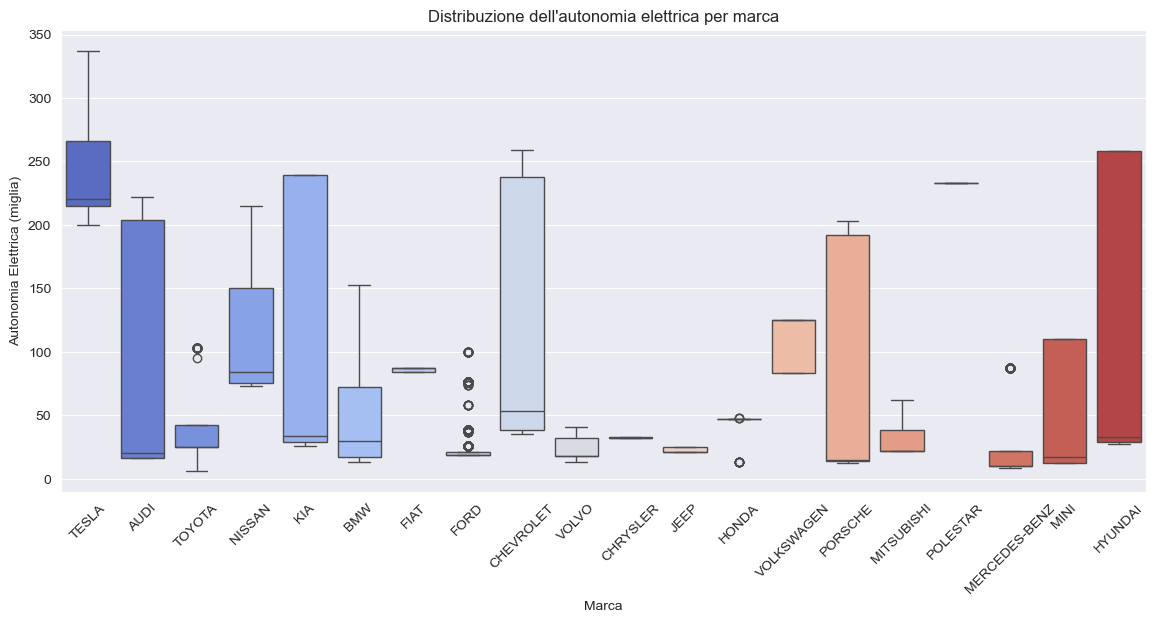

In [73]:
# Boxplot per mostrare la distribuzione dell'autonomia elettrica per marca
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Make', y='Electric Range', palette='coolwarm', hue='Make')
plt.title('Distribuzione dell\'autonomia elettrica per marca')
plt.xlabel('Marca')
plt.ylabel('Autonomia Elettrica (miglia)')
plt.xticks(rotation=45)
plt.show()

Il boxplot rappresenta la distribuzione dell'autonomia elettrica (in miglia) per marca. Ogni scatola rappresenta i quartili di distribuzione per una marca specifica, e i pallini indicano potenziali outliers, ovvero valori che si discostano significativamente dal resto dei dati.

Spiegazione del Boxplot:
La scatola centrale (box) rappresenta i quartili dal 25° al 75° percentile. La linea orizzontale all'interno della scatola è la mediana (50° percentile), che indica il valore centrale della distribuzione.
Le “whiskers” (i baffi) sono le linee che si estendono dalla scatola, di solito fino a 1,5 volte l'intervallo interquartile (IQR) al di sopra e al di sotto della scatola. Qualsiasi punto al di fuori di queste linee viene considerato un outlier.
I pallini fuori dai baffi rappresentano appunto gli outliers, valori molto distanti dalla distribuzione principale.

Andiamo quindi a individuare gli outliers e ad evidenziarli meglio.

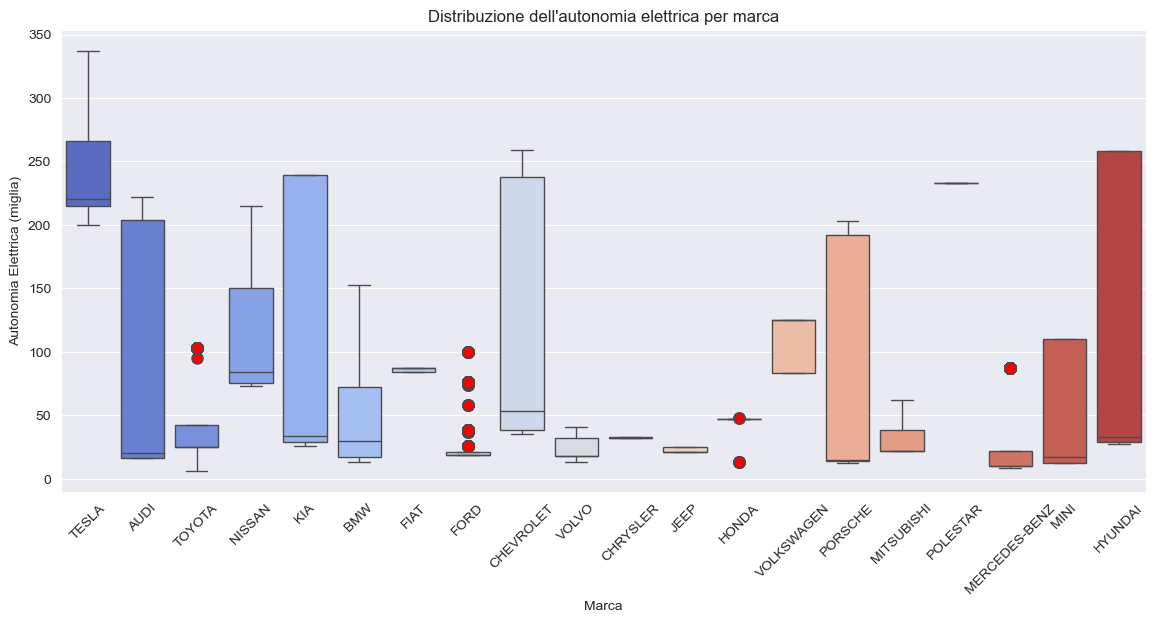

In [74]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='Make', y='Electric Range', palette='coolwarm', hue='Make', showfliers=True, flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title('Distribuzione dell\'autonomia elettrica per marca')
plt.xlabel('Marca')
plt.ylabel('Autonomia Elettrica (miglia)')
plt.xticks(rotation=45)
plt.show()

Andando ad analizzare il dataset, si può concludere che i modelli rappresentati dai punti in rosso non sono altro che modelli poco venduti che presentano un'autonomia particolarmente sopra la media (eccetto Honda) della marca.

In [75]:
#df_filtered.head()
print(df_filtered.columns)
print(df_filtered.dtypes)

Index(['County', 'City', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type', 'Electric Range', 'Electric Utility',
       'Longitude', 'latitude'],
      dtype='object')
County                    object
City                      object
Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
Electric Range             int64
Electric Utility          object
Longitude                float64
latitude                 float64
dtype: object


In [76]:
unique_electric_utilities = df_filtered['Electric Utility'].nunique()
print(f"Numero di valori unici in 'Electric Utility': {unique_electric_utilities}")
#print(df_filtered['Electric Utility'].unique())

Numero di valori unici in 'Electric Utility': 34


In [77]:
#utility_counts = df_filtered['Electric Utility'].value_counts()
#print(utility_counts)

In [78]:
# Top 3 utilities da mantenere invariate
top_3_utilities = [
    'PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)', 
    'CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)', 
    'PUGET SOUND ENERGY INC'
]

# Funzione per categorizzare le utilities
def categorize_utilities(utility):
    if utility in top_3_utilities:
        return utility
    elif 'BONNEVILLE POWER ADMINISTRATION' in utility:
        return 'BONNEVILLE POWER ADMINISTRATION'
    else:
        return 'OTHER'

# Applicare la funzione alla colonna "Electric Utility"
df_filtered['Electric Utility'] = df_filtered['Electric Utility'].apply(categorize_utilities)

# Verificare il risultato
print(df_filtered['Electric Utility'].value_counts())

Electric Utility
PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)    26123
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)     14559
PUGET SOUND ENERGY INC                           14147
BONNEVILLE POWER ADMINISTRATION                  11973
OTHER                                             2896
Name: count, dtype: int64


Aggiungiamo una cella per creare una heatmap con le coordinate geografiche dei veicoli presenti all'interno dello stato di Washington per vedere se emergono informazioni interessanti.

In [79]:
# Crea la mappa centrata sullo stato di Washington
map_washington = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

# Crea la lista delle coordinate per il heatmap
coordinates = df_filtered[['latitude', 'Longitude']].values.tolist()

# Aggiungi i punti sotto forma di HeatMap
HeatMap(coordinates, radius=8).add_to(map_washington)

# Mostra la mappa
map_washington.save("heatmap_vehicles.html")


#todo: inserire ultimi grafici mancanti
#todo: iniziare con la discretizzazione delle variabili continue e convertire le variabili categoriche
#todo: scelgiere task di regressione/classificazione. Idee: Prevedere l'autonomia elettrica, Classificare il tipo di veicolo elettrico, Classificazione geografica

Fine fase di EDA. Riepilogo prima della discretizzazione/conversione: 
1. Dataset e Colonne: Il dataset df_filtered contiene informazioni sui veicoli elettrici registrati nello stato di Washington e ha le seguenti colonne: 
- 'County', 'City', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Range', 'Electric Utility', 'Longitude', 'Latitude'.
2. Tipi di Dati: I tipi di dato sono: 
- Object: County, City, Make, Model, Electric Vehicle Type, Electric Utility. 
- Int64: Model Year, Electric Range. Float64: Longitude, Latitude.
3. Colonna 'Electric Utility': Dopo una pulizia per ridurre la complessità, i valori unici nella colonna sono stati ridotti a 5: 
- I tre principali rimangono invariati.
- Tutti quelli associati a BONNEVILLE POWER ADMINISTRATION sono stati unificati sotto un singolo valore con quel nome.
- Il resto è stato categorizzato sotto il valore 'OTHER'.
4. Visualizzazione Geografica: Hai visualizzato una mappa in formato HTML della distribuzione geografica dei veicoli usando latitudine e longitudine tramite un HeatMap in Folium.

Obiettivo: procedere alla discretizzazione delle variabili continue e alla conversione delle variabili categoriche per il futuro addestramento dei modelli.

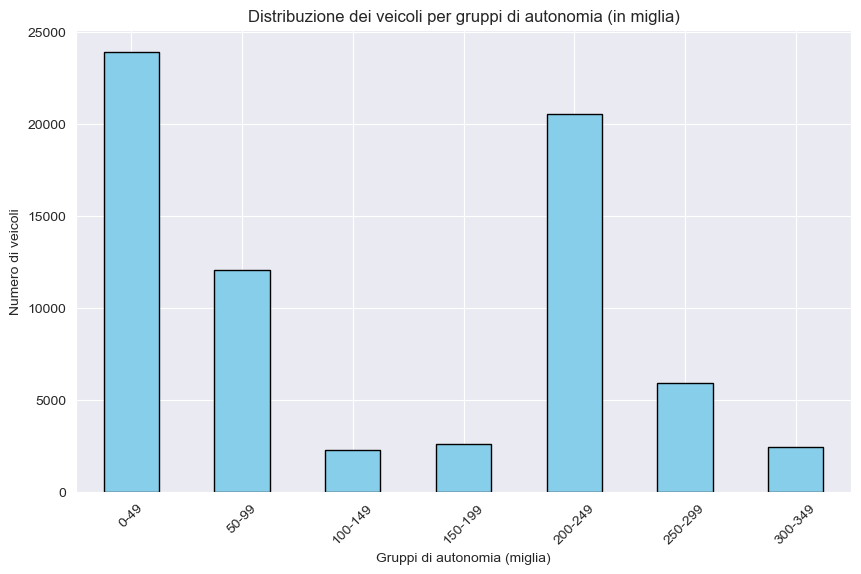

In [80]:
# Creazione di una copia del dataframe per evitare modifiche a df_filtered
df_prepped = df_filtered.copy()

# Discretizzazione dell'autonomia in gruppi di 50 miglia fino al massimo di 337
bins = list(range(0, 351, 50))
labels = [f"{i}-{i+49}" for i in bins[:-1]]

# Aggiunta della colonna di intervalli per Electric Range
df_prepped['Electric Range Group'] = pd.cut(df_prepped['Electric Range'], bins=bins, labels=labels, right=False)

# Conteggio dei veicoli per ogni intervallo
range_counts = df_prepped['Electric Range Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuzione dei veicoli per gruppi di autonomia (in miglia)')
plt.xlabel('Gruppi di autonomia (miglia)')
plt.ylabel('Numero di veicoli')
plt.xticks(rotation=45)
plt.show()


In [81]:
# Calcola l'età del veicolo
df_prepped['Vehicle Age'] = datetime.now().year - df_prepped['Model Year']

# Categorizza in "Nuovo", "Medio" e "Vecchio"
df_prepped['Age Category'] = pd.cut(df_prepped['Vehicle Age'], bins=[-1, 5, 10, float('inf')], labels=['Nuovo', 'Medio', 'Vecchio'])

# Verifica le categorie assegnate
print(df_prepped[['Model Year', 'Vehicle Age', 'Age Category']].head())


   Model Year  Vehicle Age Age Category
0        2019            5        Nuovo
2        2020            4        Nuovo
3        2020            4        Nuovo
4        2013           11      Vecchio
6        2020            4        Nuovo


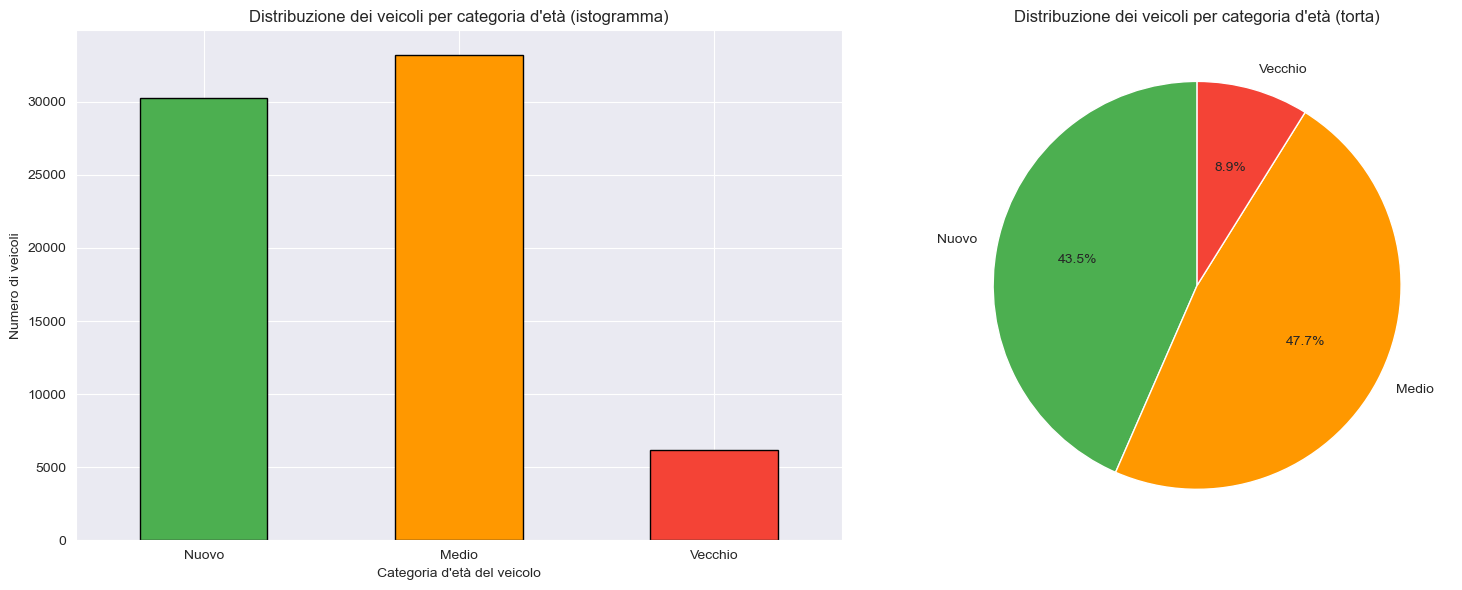

In [82]:
# Calcola l'età del veicolo
df_prepped['Vehicle Age'] = datetime.now().year - df_prepped['Model Year']

# Categorizza in "Nuovo", "Medio" e "Vecchio"
df_prepped['Age Category'] = pd.cut(df_prepped['Vehicle Age'], bins=[-1, 5, 10, float('inf')], labels=['Nuovo', 'Medio', 'Vecchio'])

# Conta il numero di veicoli per ciascuna categoria
age_counts = df_prepped['Age Category'].value_counts().sort_index()

# Crea una figura con 2 sotto-grafici
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grafico a barre
age_counts.plot(kind='bar', color=['#4CAF50', '#FF9800', '#F44336'], edgecolor='black', ax=axes[0])
axes[0].set_title("Distribuzione dei veicoli per categoria d'età (istogramma)")
axes[0].set_xlabel("Categoria d'età del veicolo")
axes[0].set_ylabel("Numero di veicoli")
axes[0].tick_params(axis='x', rotation=0)

# Grafico a torta
age_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF9800', '#F44336'], ax=axes[1])
axes[1].set_title("Distribuzione dei veicoli per categoria d'età (torta)")
axes[1].set_ylabel('')  # Rimuove l'etichetta di y

plt.tight_layout()
plt.show()

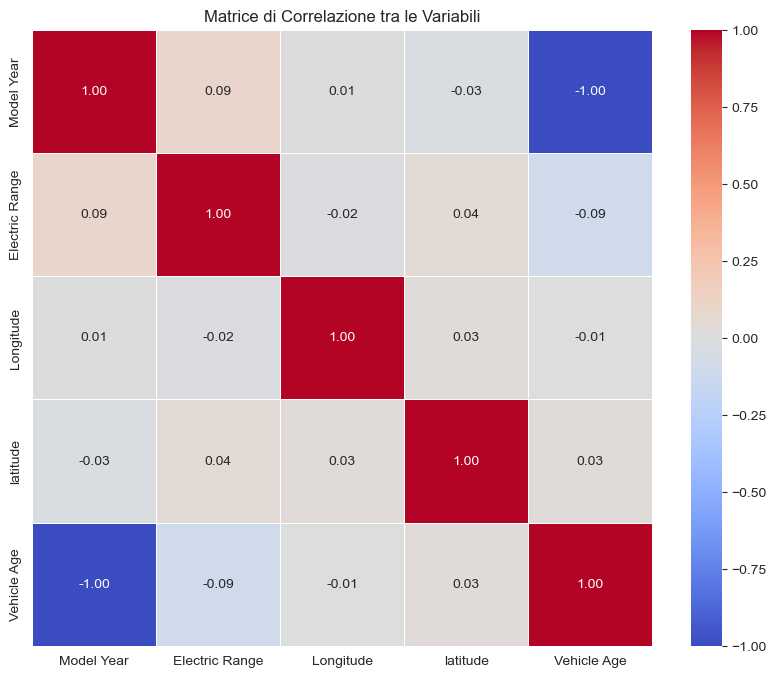

In [83]:
# Seleziona solo le colonne numeriche per la matrice di correlazione
df_numerical = df_prepped.select_dtypes(include=['float64', 'int64'])

# Calcola la matrice di correlazione
corr_matrix = df_numerical.corr()

# Crea una heatmap della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione tra le Variabili')
plt.show()


1. rimuovere model year (correlazione 1/-1 con vehicle age)
2. trasformazione colonne non presenti nella matrice di correlazione 'vecchia'
3. nuova matrice di correlazione con tutte le variabili del caso

In [84]:
#print(df_prepped.columns)
print(df_prepped.head)

<bound method NDFrame.head of            County          City  Model Year       Make     Model  \
0        Thurston      Tumwater        2019      TESLA   MODEL 3   
2       Snohomish     Snohomish        2020      TESLA   MODEL 3   
3            King       Seattle        2020      TESLA   MODEL 3   
4       Snohomish       Edmonds        2013      TESLA   MODEL S   
6       Snohomish    Marysville        2020      TESLA   MODEL 3   
...           ...           ...         ...        ...       ...   
134465      Clark     Vancouver        2017  CHEVROLET      VOLT   
134466       King        Seatac        2023       JEEP  WRANGLER   
134468  Snohomish       Edmonds        2020      TESLA   MODEL 3   
134469       King  Yarrow Point        2020      TESLA   MODEL S   
134473     Kitsap  Port Orchard        2014       FORD     C-MAX   

                     Electric Vehicle Type  Electric Range  \
0              Battery Electric Vehicle                220   
2              Battery Electr

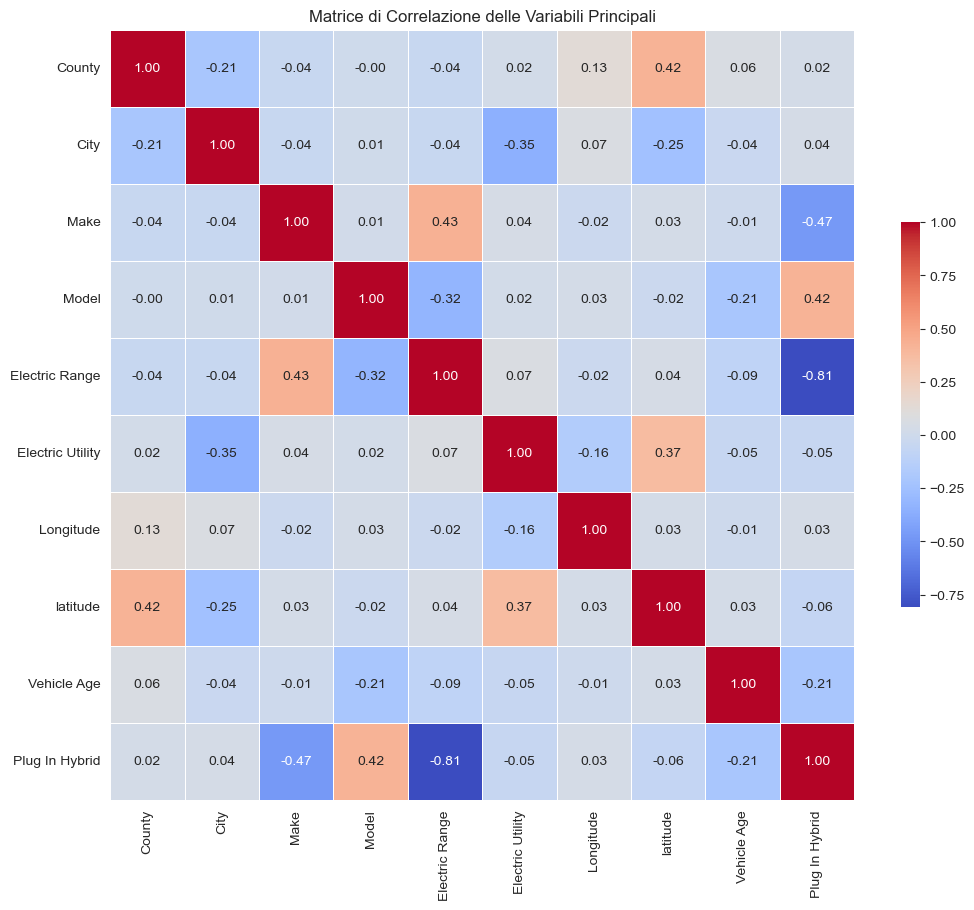

In [85]:
from sklearn.preprocessing import LabelEncoder

# 1. Selezione delle colonne principali e creazione di una copia del dataframe
selected_columns = [
    'County', 'City', 'Make', 'Model', 'Electric Vehicle Type',
    'Electric Range', 'Electric Utility', 'Longitude', 'latitude', 'Vehicle Age'
]
df_corr = df_prepped[selected_columns].copy()

# 2. Codifica delle variabili categoriche con molteplici categorie usando Label Encoding
categorical_cols = ['County', 'City', 'Make', 'Model', 'Electric Utility']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

# 3. One-Hot Encoding per 'Electric Vehicle Type' per variabili binarie
df_corr = pd.get_dummies(df_corr, columns=['Electric Vehicle Type'], drop_first=True)

# 4. Rinomina la colonna per una migliore leggibilità
# Trova il nome esatto della colonna che contiene 'Plug-in Hybrid Electric Vehicle'
for col in df_corr.columns:
    if 'Plug-in Hybrid Electric Vehicle' in col:
        exact_column_name = col
        break

# Rinominare la colonna con il nome esatto
df_corr.rename(columns={exact_column_name: 'Plug In Hybrid'}, inplace=True)

# 5. Calcolo della matrice di correlazione
corr_matrix = df_corr.corr()

# 6. Visualizzazione della matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.5}
)
plt.title('Matrice di Correlazione delle Variabili Principali')
plt.show()

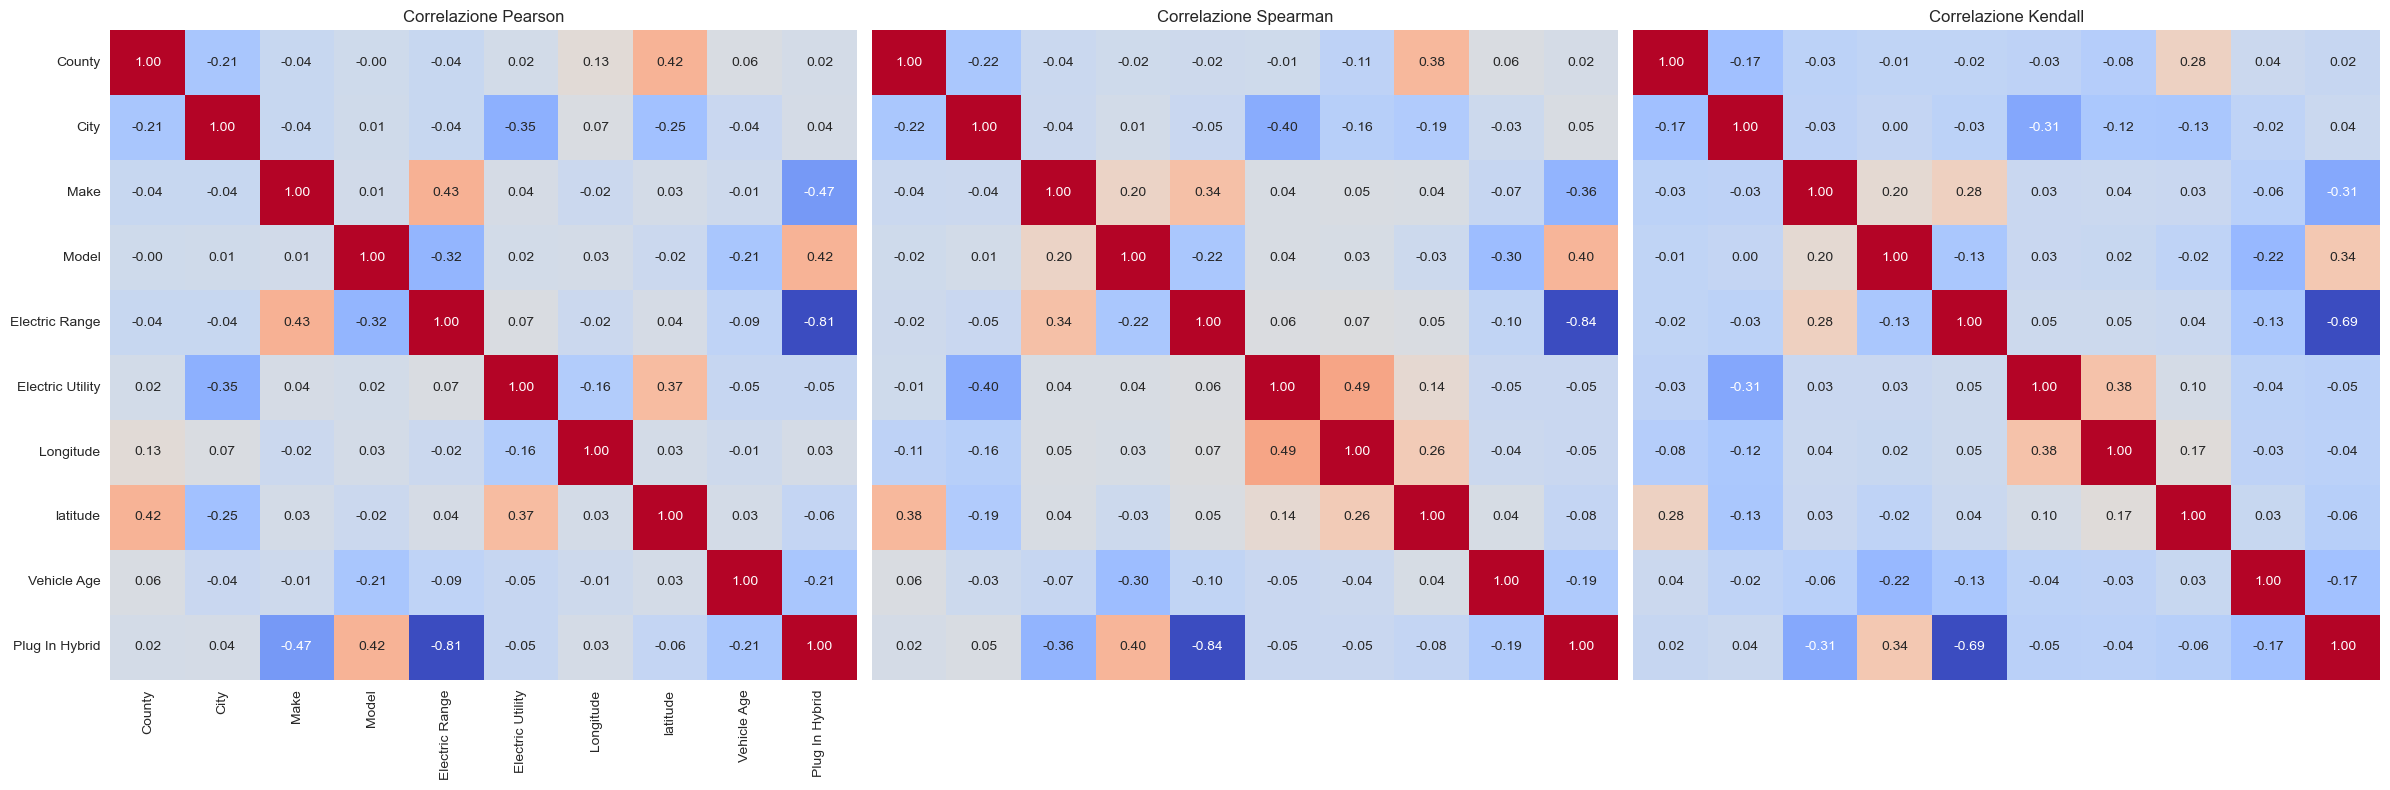

In [86]:
# Calcola le tre diverse matrici di correlazione
corr_pearson = df_corr.corr(method='pearson')
corr_spearman = df_corr.corr(method='spearman')
corr_kendall = df_corr.corr(method='kendall')

# Imposta la dimensione della figura e crea i tre sotto-grafici
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Matrice di correlazione con Pearson (con annotazioni complete)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0], cbar=False)
axes[0].set_title('Correlazione Pearson')

# Matrice di correlazione con Spearman (senza etichette)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1], cbar=False, xticklabels=False, yticklabels=False)
axes[1].set_title('Correlazione Spearman')

# Matrice di correlazione con Kendall (senza etichette)
sns.heatmap(corr_kendall, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2], cbar=False, xticklabels=False, yticklabels=False)
axes[2].set_title('Correlazione Kendall')

# Regola la disposizione per una migliore visualizzazione
plt.tight_layout()
plt.show()


# Classificazione
### Predizione della tipologia di un veicolo elettrico  
Definiamo le caratteristiche (features) e il target per il task di classificazione del tipo di veicolo (Plug-in Hybrid vs. Battery Electric). Utilizziamo il metodo train_test_split per suddividere i dati in un training set e un test set, con l'obiettivo di valutare le prestazioni del modello in un ambiente non visto. I dati saranno divisi in un rapporto 80/20.

In [87]:
from sklearn.model_selection import train_test_split

# Seleziona le caratteristiche (features) e il target
features = ['Electric Range', 'Vehicle Age', 'County', 'City', 'Electric Utility', 'Longitude', 'latitude']
X = df_corr[features]
y = df_corr['Plug In Hybrid']  # Target

# Dividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifica delle dimensioni dei dati
print("Dimensioni Training Set:", X_train.shape)
print("Dimensioni Test Set:", X_test.shape)


Dimensioni Training Set: (55758, 7)
Dimensioni Test Set: (13940, 7)


### Addestramento e Valutazione del Modello
In questa sezione, utilizziamo il modello Random Forest per il task di classificazione. Dopo aver inizializzato il modello con un valore casuale fisso per garantire la riproducibilità, addestriamo il modello sui dati di training. Successivamente, eseguiamo le previsioni sul test set e valutiamo le prestazioni del modello utilizzando il Classification Report, che fornisce metriche come precision, recall, e F1-score.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inizializza il modello
clf = RandomForestClassifier(random_state=42)

# Addestra il modello
clf.fit(X_train, y_train)

# Previsioni sui dati di test
y_pred = clf.predict(X_test)

# Valutazione del modello
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      8535
        True       1.00      1.00      1.00      5405

    accuracy                           1.00     13940
   macro avg       1.00      1.00      1.00     13940
weighted avg       1.00      1.00      1.00     13940



### Prima Valutazione del Modello: FALLIMENTO CLAMOROSO
In questa fase, abbiamo addestrato il modello Random Forest sui dati di training e valutato le sue prestazioni sul test set. Il Classification Report ha mostrato un'accuratezza del 100%, indicando un caso di overfitting: il modello sta memorizzando i dati anziché generalizzare. Per risolvere questo problema, nelle prossime sezioni, interverremo sui dati e sui parametri del modello.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Inizializza il modello
clf = RandomForestClassifier(random_state=42)

# Addestra il modello
clf.fit(X_train, y_train)

# Previsioni sui dati di test
y_pred = clf.predict(X_test)

# Valutazione del modello
print("Classification Report:\n", classification_report(y_test, y_pred))


### ROC Curve

Proviamo a calcolare la roc curve, ma visti i parametri di prima, ci aspettiamo un risultato pessimo, ed infatti...

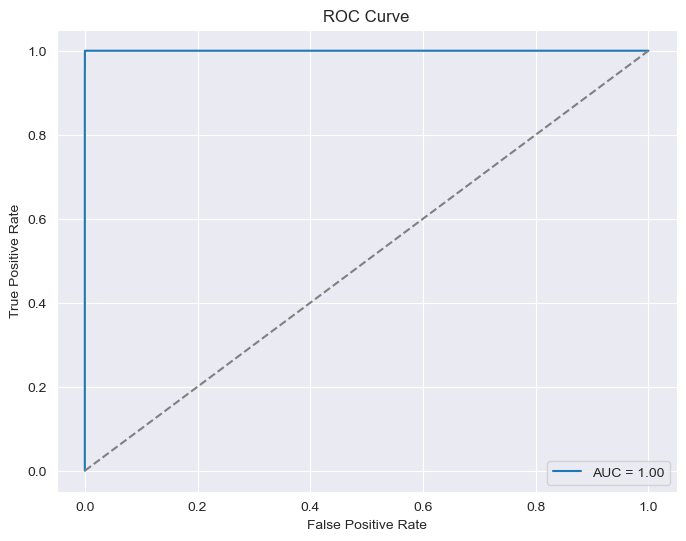

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcola la probabilità predetta
y_pred_random_forest = clf.predict_proba(X_test)[:, 1]

# Calcola la ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random_forest)
roc_auc = auc(fpr, tpr)

# Grafico ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Identificazione delle Cause dell'Overfitting
Visti i risultati insoddisfacenti ottenuti con il modello Random Forest, eseguiamo un'analisi delle feature importances per identificare eventuali variabili che dominano eccessivamente il modello, rendendo il task di classificazione troppo semplice (e causando overfitting). Generiamo un grafico delle importanze per visualizzare quali caratteristiche influenzano maggiormente le predizioni. Questo ci permetterà di individuare variabili che potrebbero essere trasformate, discretizzate o rimosse per migliorare la generalizzazione del modello.

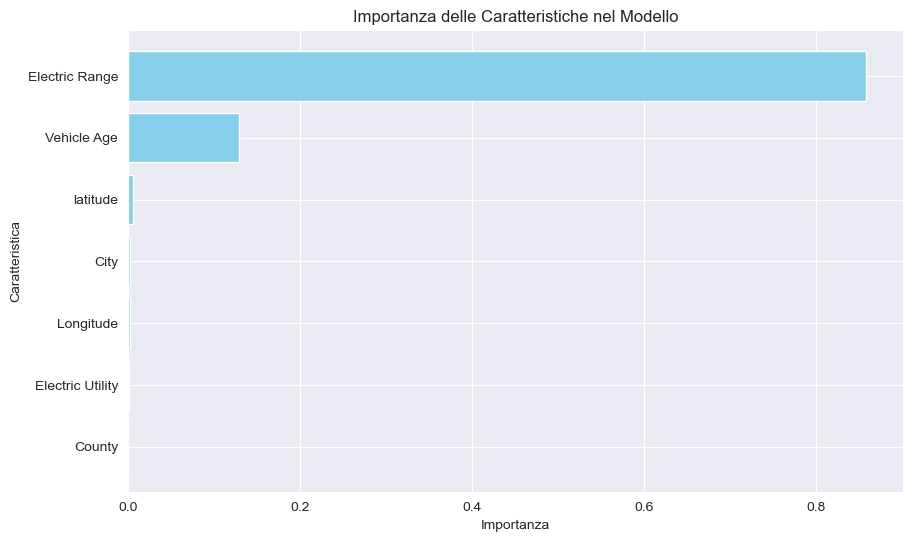

            Feature  Importance
0    Electric Range    0.858228
1       Vehicle Age    0.129141
6          latitude    0.005508
3              City    0.002627
5         Longitude    0.002501
4  Electric Utility    0.001473
2            County    0.000522


In [90]:
# Analisi delle feature importance nella Random Forest
import pandas as pd
import matplotlib.pyplot as plt

# Ottieni le feature importance
importance = clf.feature_importances_
feature_names = X.columns

# Ordina le feature importances
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Grafico delle feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.title('Importanza delle Caratteristiche nel Modello')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance)


### Valutazione di un Modello più Semplice
Per comprendere se il problema di overfitting è legato alla complessità del modello, proviamo ad addestrare e valutare una Logistic Regression, che è un modello lineare e meno suscettibile all'overfitting rispetto alla Random Forest. Dopo aver addestrato il modello sui dati di training, utilizziamo il Classification Report per confrontare le prestazioni della Logistic Regression con quelle ottenute precedentemente con Random Forest. Questo confronto ci aiuterà a identificare se il problema persiste anche con un approccio più semplice.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Inizializza il modello
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Addestra il modello
logreg.fit(X_train, y_train)

# Previsioni
y_pred_logreg = logreg.predict(X_test)

# Valutazione
print("Classification Report Logistic Regression:\n", classification_report(y_test, y_pred_logreg))


Classification Report Logistic Regression:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99      8535
        True       0.99      0.96      0.98      5405

    accuracy                           0.98     13940
   macro avg       0.98      0.98      0.98     13940
weighted avg       0.98      0.98      0.98     13940



### Valutazione dei Risultati
I risultati della Logistic Regression mostrano un'accuratezza del 98%, con ottimi valori di precision, recall, e F1-score. Questo indica che la Logistic Regression riesce a classificare correttamente i veicoli con un livello di generalizzazione superiore rispetto alla Random Forest, che soffriva di overfitting.

### Conclusioni
1. La Logistic Regression è un modello più semplice che sembra adattarsi meglio ai dati, evitando di "memorizzarli" come accadeva con la Random Forest.
2. Questo risultato evidenzia che il problema di overfitting osservato con la Random Forest potrebbe essere attribuito a una combinazione di dati troppo predittivi e modello troppo complesso.

### Confronto delle Curve ROC
#### Analisi
Per approfondire il confronto, tracciamo le curve ROC per entrambi i modelli (Random Forest e Logistic Regression). Questo ci permette di visualizzare come ciascun modello bilancia i tassi di falsi positivi e veri positivi e di confrontare le rispettive AUC (Area Under the Curve). Un'AUC più alta indica una migliore capacità del modello di distinguere tra le classi.

#### Cosa Aspettarsi
1. La curva della Random Forest dovrebbe essere perfetta (AUC = 1.0), coerente con il problema di overfitting osservato.
2. La Logistic Regression, invece, potrebbe mostrare una curva più vicina alla realtà, con un'AUC elevata ma non perfetta.
Eseguiamo il codice e confrontiamo visivamente le curve per trarre ulteriori conclusioni sulla scelta del modello più adatto.


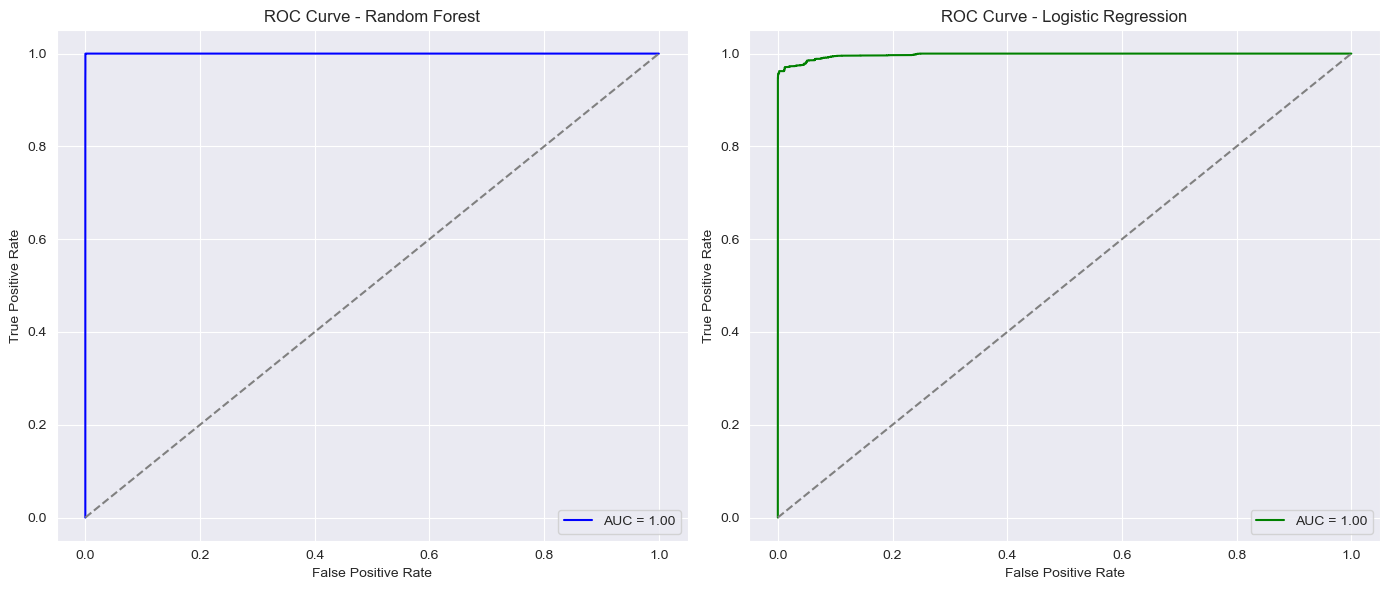

In [94]:
import matplotlib.pyplot as plt

# Calcolo ROC per Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_logreg)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calcolo ROC per Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_random_forest)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot delle due ROC Curve
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve Random Forest
axes[0].plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.2f}', color='blue')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title('ROC Curve - Random Forest')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# ROC Curve Logistic Regression
axes[1].plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.2f}', color='green')
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title('ROC Curve - Logistic Regression')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()


### Ottimizzazione del Modello Random Forest
#### Ricerca dei Parametri Ottimali
Per valutare se il problema di overfitting osservato con il modello Random Forest può essere mitigato ottimizzando i suoi parametri, utilizziamo la tecnica di RandomizedSearchCV. Questo approccio permette di esplorare casualmente un sottoinsieme dello spazio dei parametri, combinando diverse configurazioni in modo efficiente. La ricerca utilizzerà una cross-validation a 5-fold per garantire una valutazione robusta.

#### Parametri in Esame
1. Numero di alberi (n_estimators): Controlla la dimensione della foresta.
2. Profondità massima degli alberi (max_depth): Limita la complessità del modello.
3. Criterio per la suddivisione (criterion): Controlla la funzione utilizzata per la qualità delle suddivisioni.
4. Numero minimo di campioni per dividere un nodo (min_samples_split) e per una foglia (min_samples_leaf): Riduce il rischio di overfitting aumentando la generalizzazione.
5. Numero massimo di feature (max_features) e nodi foglia (max_leaf_nodes): Aiutano a controllare la complessità del modello.

#### Obiettivo
Trovare una combinazione di parametri che migliori la capacità predittiva del modello senza causare overfitting. Successivamente, il modello ottimizzato sarà valutato sui dati di test per verificare il miglioramento delle prestazioni.

Eseguiamo il codice sopra per identificare i parametri ottimali. Una volta ottenuti, rieseguiremo il modello Random Forest con queste impostazioni per confrontare i nuovi risultati con quelli precedenti.

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definizione del modello
rf = RandomForestClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_distributions = {
    'n_estimators': [100, 200, 300, 500],                  # Numero di alberi nella foresta
    'max_depth': [None, 10, 20, 30],                      # Profondità massima degli alberi
    'criterion': ['gini', 'entropy', 'log_loss'],         # Criterio per valutare le suddivisioni
    'min_samples_split': [2, 5, 10],                      # Minimo numero di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 4],                        # Minimo numero di campioni in una foglia
    'max_features': [2, 3, 4, 5, 'sqrt', 'log2'],         # Numero massimo di feature da considerare per nodo
    'max_leaf_nodes': [None, 10, 20, 50, 100],            # Numero massimo di nodi foglia
}

# RandomizedSearch con 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=100,  # Numero massimo di combinazioni casuali da testare
    cv=5,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Addestra il modello con la random search
random_search.fit(X_train, y_train)

# Migliori parametri
print("Migliori Parametri:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Migliori Parametri: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_leaf_nodes': 50, 'max_features': 5, 'max_depth': 30, 'criterion': 'entropy'}


### Eseguiamo nuovamente il predict e vediamo la ROC curve

Classification Report - Random Forest Ottimizzato:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      8535
        True       1.00      1.00      1.00      5405

    accuracy                           1.00     13940
   macro avg       1.00      1.00      1.00     13940
weighted avg       1.00      1.00      1.00     13940



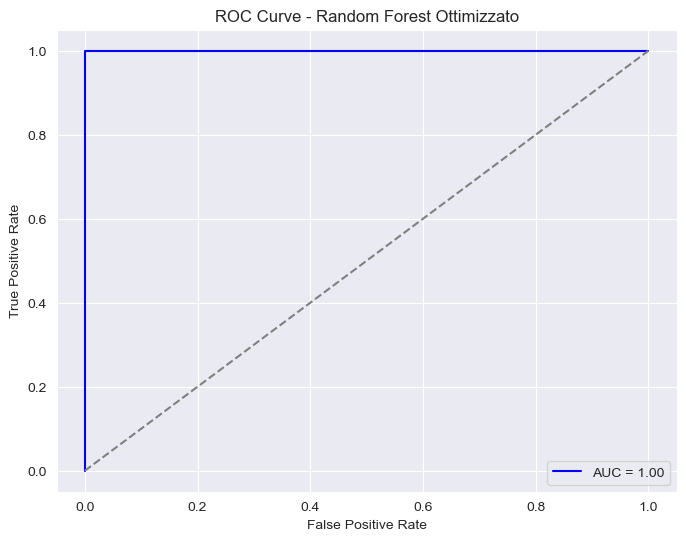

In [96]:
# Modello ottimizzato usando RandomizedSearchCV
best_rf = random_search.best_estimator_

# Previsioni sui dati di test
y_pred_rf_optimized = best_rf.predict(X_test)
y_pred_proba_rf_optimized = best_rf.predict_proba(X_test)[:, 1]

# Report di classificazione
from sklearn.metrics import classification_report
print("Classification Report - Random Forest Ottimizzato:\n", classification_report(y_test, y_pred_rf_optimized))

# Calcolo e grafico della curva ROC per il modello ottimizzato
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcola la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf_optimized)
roc_auc = auc(fpr, tpr)

# Grafico ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Random Forest Ottimizzato')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### Non è tutto perduto!

Da questi ultimi risultati abbiamo comunque appreso che, nonostante gli accorgimenti sul modello, questo tipo di classificatore tende comunque all'overfitting. Di conseguenza la conclusione più naturale è che ci siano ulteriori manipolazioni da fare sui dati. 

In [98]:
print(X.columns)

Index(['Electric Range', 'Vehicle Age', 'County', 'City', 'Electric Utility',
       'Longitude', 'latitude'],
      dtype='object')


In [101]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Crea una copia del dataset
X_modified = X.copy()

# Aggiungi rumore alla colonna Electric Range
X_modified['Electric Range'] = X_modified['Electric Range'] + np.random.normal(0, 10, size=X_modified.shape[0])

# Discretizza Electric Range in gruppi
X_modified['Electric Range'] = pd.cut(
    X_modified['Electric Range'],
    bins=[0, 100, 200, 300, 400],
    labels=['0-100', '101-200', '201-300', '301-400']
)

# Codifica Electric Range con Label Encoding
le = LabelEncoder()
X_modified['Electric Range'] = le.fit_transform(X_modified['Electric Range'])

# Rimuovi Longitude e Latitude
X_modified = X_modified.drop(columns=['Longitude', 'latitude'])

# Verifica il nuovo dataset
print(X_modified.head())

   Electric Range  Vehicle Age  County  City  Electric Utility
0               2            5       8   176                 3
2               2            4       6   157                 3
3               3            4       2   151                 1
4               2           11       6    50                 3
6               3            4       6   100                 3


Classification Report - Random Forest con Dati Modificati:
               precision    recall  f1-score   support

       False       0.91      0.94      0.93      8535
        True       0.90      0.86      0.88      5405

    accuracy                           0.91     13940
   macro avg       0.91      0.90      0.90     13940
weighted avg       0.91      0.91      0.91     13940



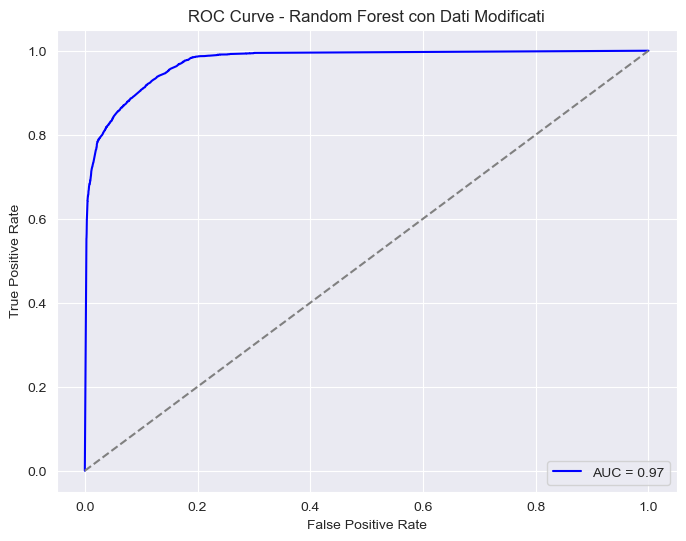

In [102]:
# Dividi i dati modificati in training e test set
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_modified, y, test_size=0.2, random_state=42)

# Modello Random Forest
rf_modified = RandomForestClassifier(random_state=42)
rf_modified.fit(X_train_mod, y_train_mod)

# Previsioni
y_pred_rf_mod = rf_modified.predict(X_test_mod)
y_pred_proba_rf_mod = rf_modified.predict_proba(X_test_mod)[:, 1]

# Report di classificazione
print("Classification Report - Random Forest con Dati Modificati:\n", classification_report(y_test_mod, y_pred_rf_mod))

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_mod, y_pred_proba_rf_mod)
roc_auc = auc(fpr, tpr)

# Grafico ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve - Random Forest con Dati Modificati')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()